### Point Operations ###

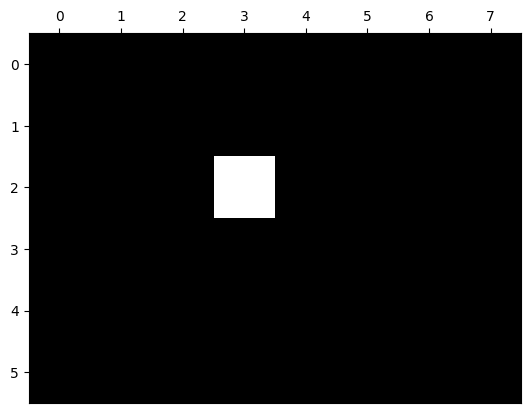

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Create a 6x8 array of zeros (black pixels), dtype specifies that the elements are 8-bit unsigned integers
im = np.zeros((6, 8), dtype=np.uint8)

# Set the pixel at row 2, column 3 to 255 (white pixel)
im[2, 3] = 255

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Display the image in grayscale, with values ranging from 0 to 255
ax.imshow(im, cmap='gray', vmin=0, vmax=255)

# Move the x-axis to the top of the image
ax.xaxis.tick_top()

# Show the plot
plt.show()


A color scale Image

[100 255   0]


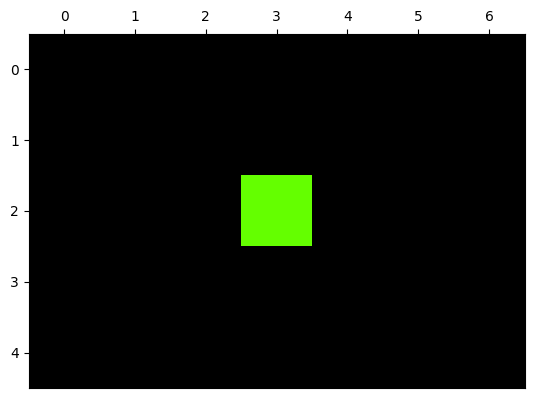

In [2]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Create a 6x8 array of zeros with 3 channels (RGB), dtype specifies that the elements are 8-bit unsigned integers
im = np.zeros((5, 7, 3), dtype=np.uint8)

# Set the pixel at row 2, column 3 to [255, 255, 100] (an RGB color)
im[2, 3] = [100, 255, 0]

# Print the value of the pixel at row 2, column 3
print(im[2, 3])

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Move the x-axis to the top of the image
ax.xaxis.tick_top()

# Show the plot
plt.show()


Opening and Displaying Images

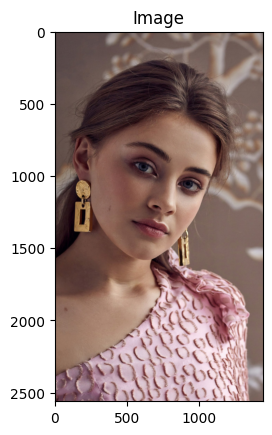

11059200
(2560, 1440, 3)
uint8


In [4]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image in color mode
img = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\photos\josephine.jpeg', cv.IMREAD_COLOR)
# Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Set the title of the image
ax.set_title('Image')

# Show the plot
plt.show()

print(img.size)
print(img.shape)
print(img.dtype)


Increasing the Brightness Using OpenCV

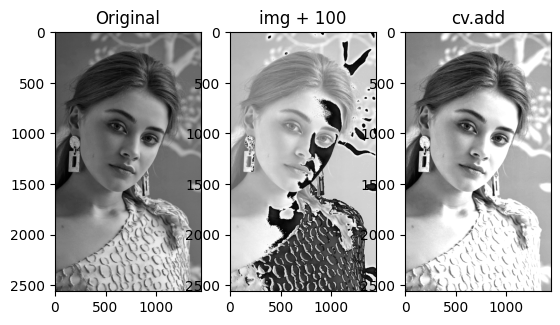

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image in grayscale mode
img = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\photos\josephine.jpeg', cv.IMREAD_GRAYSCALE)

# Add 100 to each pixel value in the image using numpy addition
imgb = img + 100

# Add 100 to each pixel value in the image using cv2.add
imgc = cv.add(img, 100)

# Create a figure and axis for plotting
f, ax = plt.subplots(1, 3)

# Display the original image
ax[0].imshow(img, cmap="gray")
ax[0].set_title('Original')

# Display the image after numpy addition
ax[1].imshow(imgb, cmap="gray")
ax[1].set_title('img + 100')

# Display the image after cv2.add
ax[2].imshow(imgc, cmap="gray")
ax[2].set_title('cv.add')

# Show the plot
plt.show()


comments : 

imgb = img + 100 uses numpy addition to add 100 to each pixel value. Note that this can cause pixel values to wrap around if they exceed 255, as numpy does not handle overflow in the same way as OpenCV.
imgc = cv.add(img, 100) uses OpenCV's cv.add function to add 100 to each pixel value. This method handles overflow by saturating pixel values at 255.

Zeroing Out Green and Blue Planes

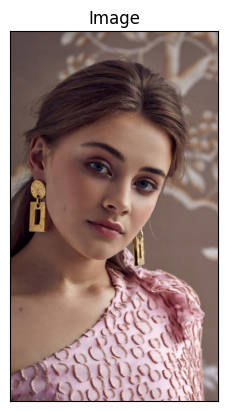

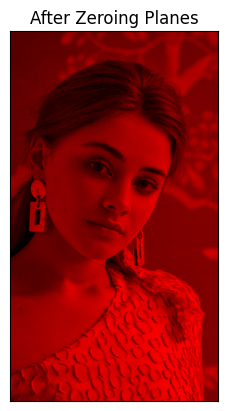

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv

# Read the image in any color format
img = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\photos\josephine.jpeg', cv.IMREAD_ANYCOLOR)

# Check if the image was loaded correctly
if img is None:
    print('Image could not be read.')
    assert False

# Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display the original image
plt.imshow(img)
plt.title('Image')
plt.xticks([]), plt.yticks([])  # Remove x and y ticks
plt.show()

# Zero out the green and blue channels
img[:, :, 1:3] = 0

# Display the modified image
plt.imshow(img)
plt.title('After Zeroing Planes')
plt.xticks([]), plt.yticks([])  # Remove x and y ticks
plt.show()


IntensityTransforms: IdentityTransformation

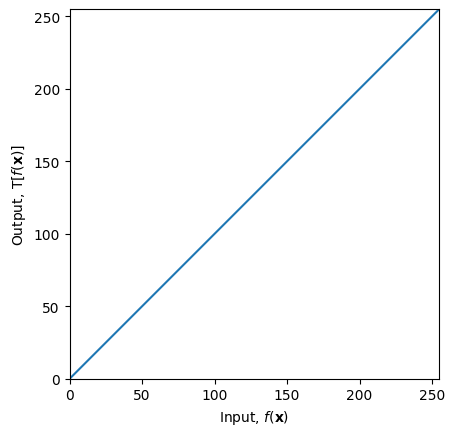

(241, 241)


In [12]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Create a transformation array from 0 to 255
transform = np.arange(0, 256).astype('uint8')

# Plot the transformation function
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

# Read the original grayscale image
img_orig = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\photos\avatar.jpeg', cv.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if img_orig is None:
    print('Image could not be read.')
    assert False

# Print the shape of the original image
print(img_orig.shape)


# Display the original image using OpenCV
cv.namedWindow('Original Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Original Image', img_orig)
cv.waitKey(0)

# Apply the transformation using a lookup table (LUT)
image_transformed = cv.LUT(img_orig, transform)

# Display the transformed image using OpenCV
cv.imshow('Transformed Image', image_transformed)
cv.waitKey(0)

# Destroy all OpenCV windows
cv.destroyAllWindows()


IntensityTransforms: negative transform

[255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238
 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220
 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202
 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184
 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166
 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148
 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130
 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112
 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97  96  95  94
  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78  77  76
  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60  59  58
  57  56  55  54  53  52  51  50  49  48  47  46  45  44  43  42  41  40
  39  38  37  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22
  21  20  19  18  17  16  15  14  13  12  11  10   

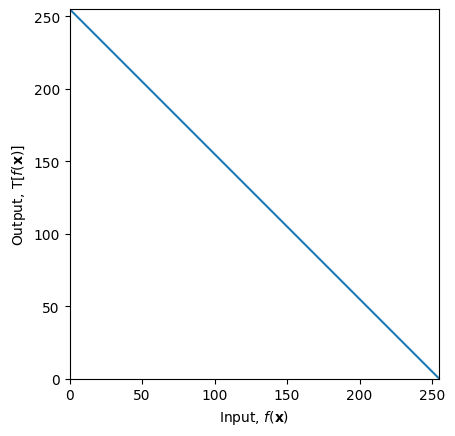

(241, 241)


In [13]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Create a transformation array from 0 to 255
transform = np.arange(255,-1, -1).astype('uint8')
print(transform)
# Plot the transformation function
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

# Read the original grayscale image
img_orig = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\photos\avatar.jpeg', cv.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if img_orig is None:
    print('Image could not be read.')
    assert False

# Print the shape of the original image
print(img_orig.shape)


# Display the original image using OpenCV
cv.namedWindow('Original Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Original Image', img_orig)
cv.waitKey(0)

# Apply the transformation using a lookup table (LUT)
image_transformed = cv.LUT(img_orig, transform)

# Display the transformed image using OpenCV
cv.imshow('Transformed Image', image_transformed)
cv.waitKey(0)

# Destroy all OpenCV windows
cv.destroyAllWindows()

intensity windowing

101
50
105
256


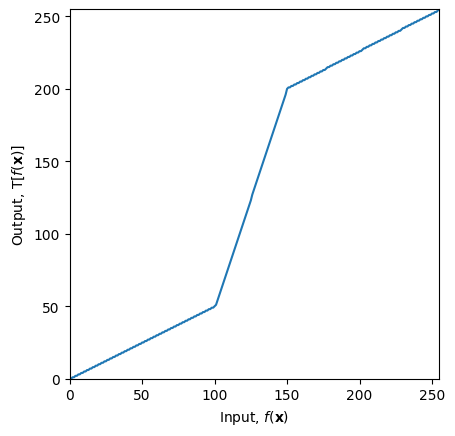

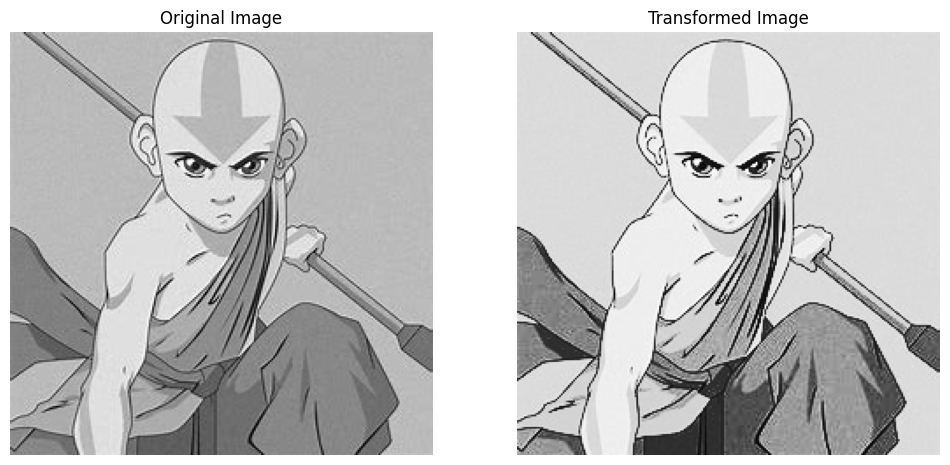

In [5]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define control points for intensity transformation
c = np.array([(100, 50), (150, 200)])

# Create piecewise linear segments for the transformation function
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1, 1] + 1, 255, 255 - c[1, 0]).astype('uint8')
print(len(t3))

# Concatenate the segments to form the complete transformation function
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(transform))

# Plot the transformation function
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

# Read the original grayscale image
img_orig = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\photos\avatar.jpeg', cv.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if img_orig is None:
    print('Image could not be read.')
    assert False

# Apply the transformation using a lookup table (LUT)
image_transformed = cv.LUT(img_orig, transform)

# Display the original and transformed images using Matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axs[0].imshow(img_orig, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Display the transformed image
axs[1].imshow(image_transformed, cmap='gray')
axs[1].set_title('Transformed Image')
axs[1].axis('off')

plt.show()


Applying this transformation to a grayscale photo will adjust the contrast and brightness of the image based on the defined mapping. Darker areas will generally remain dark or become slightly darker, while lighter areas will remain light or become lighter, depending on the values defined in transform. The exact visual effect can vary significantly based on the specific values chosen for c and the segments of transform, reflecting the intended artistic or analytical transformation applied to the image's pixel intensities.

Gamma Corrctions

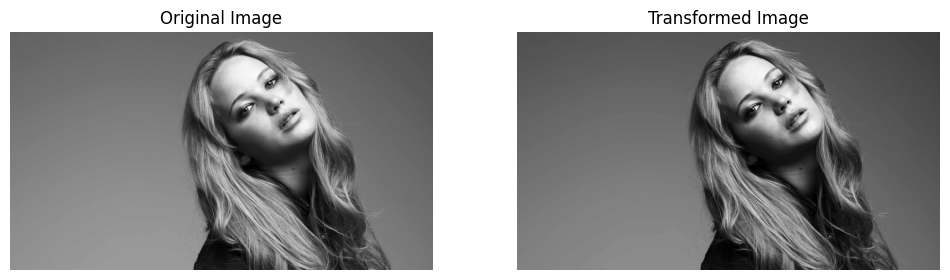

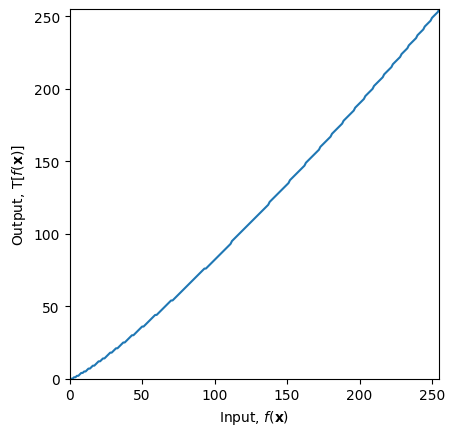

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
img = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\images\jeniffer.jpg', cv.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if img is None:
    raise FileNotFoundError("The image 'jeniffer.jpg' was not found. Please check the file path.")

# Apply gamma correction
gamma = 1.2
t = np.array([(p/255)**gamma*255 for p in range(0, 256)]).astype(np.uint8)
g = cv.LUT(img, t)

# Display the original and transformed images using Matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plot the transformation function
fig, ax = plt.subplots()
ax.plot(t)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')



# Display the original image
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Display the transformed image
axs[1].imshow(g, cmap='gray')
axs[1].set_title('Transformed Image')
axs[1].axis('off')

plt.show()


Histograms Using OpenCV
gray image

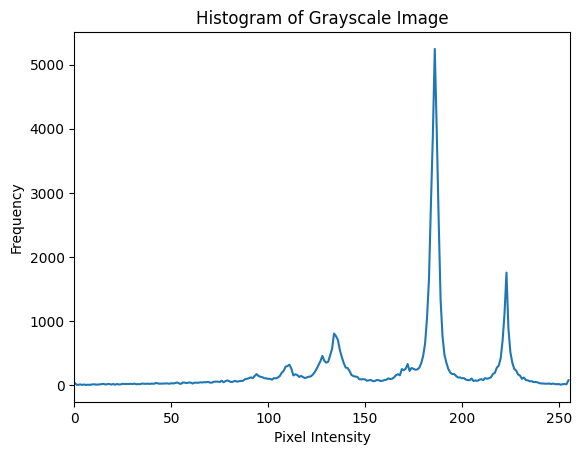

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
img = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\photos\avatar.jpeg', cv.IMREAD_GRAYSCALE)

# Calculate histogram using OpenCV
hist = cv.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist)
plt.xlim([0, 256])
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


Listing: Histogram of a Color Image

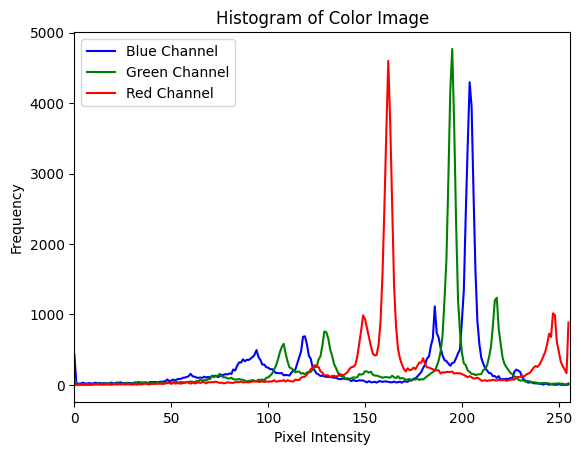

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the color image
img = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\photos\avatar.jpeg', cv.IMREAD_COLOR)

# Define colors for each channel
color = ('b', 'g', 'r')

# Plot histograms for each color channel
for i, c in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=c)
    
plt.xlim([0, 256])
plt.title('Histogram of Color Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(['Blue Channel', 'Green Channel', 'Red Channel'])
plt.show()


Histogram Equalization

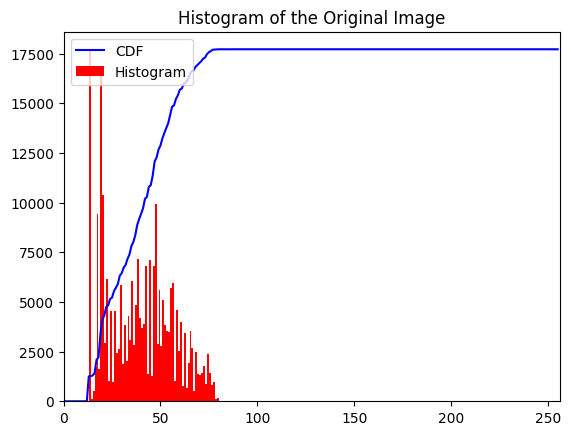

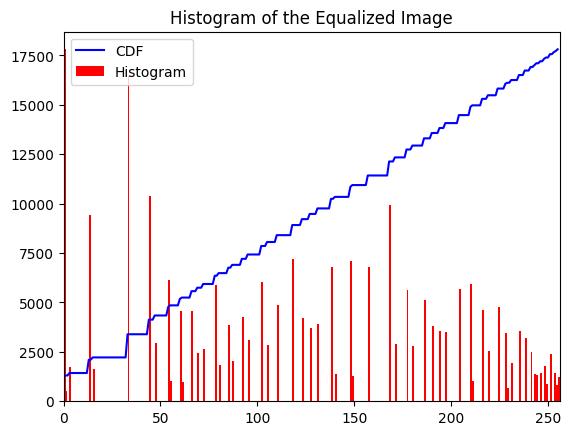

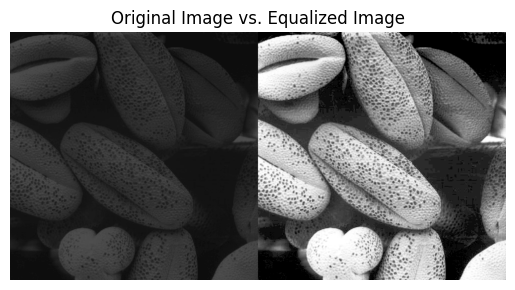

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
img = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\images\shells.tif', cv.IMREAD_GRAYSCALE)

# Calculate histogram and cumulative distribution function (CDF) of the original image
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# Plot CDF and histogram of the original image
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(['CDF', 'Histogram'], loc='upper left')
plt.title('Histogram of the Original Image')
plt.show()

# Perform histogram equalization
equ = cv.equalizeHist(img)

# Calculate histogram and CDF of the equalized image
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# Plot CDF and histogram of the equalized image
plt.plot(cdf_normalized, color='b')
plt.hist(equ.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(['CDF', 'Histogram'], loc='upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

# Combine original and equalized images for visualization
res = np.hstack((img, equ))

# Display combined image
plt.axis('off')
plt.imshow(res, cmap='gray')
plt.title('Original Image vs. Equalized Image')
plt.show()
